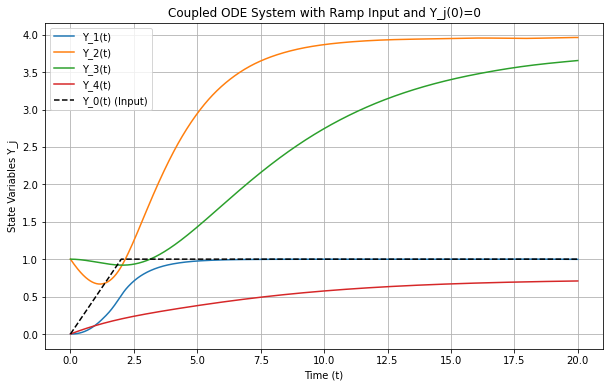

CSV file 'ODE_Simulation_Results.csv' has been saved successfully.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

# Define the ramp function for Y_0(t)
def Y0_t(t, Y0_max=1.0, t1=2.0):
    return np.where(t < t1, (Y0_max / t1) * t, Y0_max)

# Define the activation function f_act(X)
def f_act(X, b, K, n):
    return (b * X**n) / (K**n + X**n)

# Define the ODE system
def coupled_odes(t, Y, tau_Y, W, Y_max, b, K, n, Y0_max, t1):
    dYdt = np.zeros(4)  # 4 state variables
    Y_i = Y0_t(t, Y0_max, t1)  # The input Y_0(t)
    
    for j in range(4):  
        activation = f_act(Y_i, b[j], K[j], n[j])  # Compute activation function
        dYdt[j] = (1 / tau_Y[j]) * (W[j] * activation * Y_max[j] - Y[j])
        Y_i = Y[j]  # Pass the output as input to the next equation
    
    return dYdt

# Define parameters
tau_Y = [1.0, 2.0, 5.0, 4.0]  
W = [1.0, 4.0, 1.0, 1.0]  
Y_max = [1.0, 1.0, 1.0, 1.0]  
b = [41.2, 100, 100.0, 1.0]  
K = [14, 100, 100, 0.9]  
n = [1.4, 1.0, 1.0, 0.7]  

# Initial conditions
Y0 = [0.0, 1.0, 1.0, 0.0]  

# Input parameters
Y0_max = 1.0  
t1 = 2.0  

# Time span
t_span = (0, 20)  
t_eval = np.linspace(*t_span, 1000)  

# Solve the system
sol = solve_ivp(
    coupled_odes, t_span, Y0,
    args=(tau_Y, W, Y_max, b, K, n, Y0_max, t1),
    t_eval=t_eval, method='RK45'
)

# Prepare data for CSV export
data = {'Time': sol.t}
for j in range(4):
    data[f'Y_{j+1}(t)'] = sol.y[j]

data['Y_0(t)'] = Y0_t(sol.t, Y0_max, t1)

# Create DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv("ODE_Simulation_Results.csv", index=False)

# Plot results
plt.figure(figsize=(10, 6))
for j in range(4):
    plt.plot(sol.t, sol.y[j], label=f'Y_{j+1}(t)')

plt.plot(sol.t, Y0_t(sol.t, Y0_max, t1), 'k--', label='Y_0(t) (Input)', linewidth=1.5)

plt.xlabel('Time (t)')
plt.ylabel('State Variables Y_j')
plt.title('Coupled ODE System with Ramp Input and Y_j(0)=0')
plt.legend()
plt.grid()
plt.show()

print("CSV file 'ODE_Simulation_Results.csv' has been saved successfully.")